<a href="https://colab.research.google.com/github/Roddasb/CS_5530/blob/main/Frailty_Score_2_12_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          Height      Weight        Age  Grip strength    Frailty
count  10.000000   10.000000  10.000000      10.000000  10.000000
mean   68.600000  131.900000  32.500000      26.000000   0.400000
std     1.670662   14.231811  12.860361       4.521553   0.516398
min    65.800000  112.000000  17.000000      19.000000   0.000000
25%    67.825000  120.750000  22.250000      22.500000   0.000000
50%    68.450000  136.000000  29.500000      27.000000   0.000000
75%    69.700000  141.750000  43.500000      29.750000   1.000000
max    71.500000  153.000000  51.000000      31.000000   1.000000

Preprocessed Dataset:
   Height  Weight  Age  Grip strength  Frailty
0    65.8     112   30             30        0
1    71.5     136   19             31        0
2    69.4     153   45             29        0
3    68.2     142   22             28        1
4    67.8     144   29             24        1
5    68.7     123   50             26        0
6    69.8     141   51             22        1
7    70

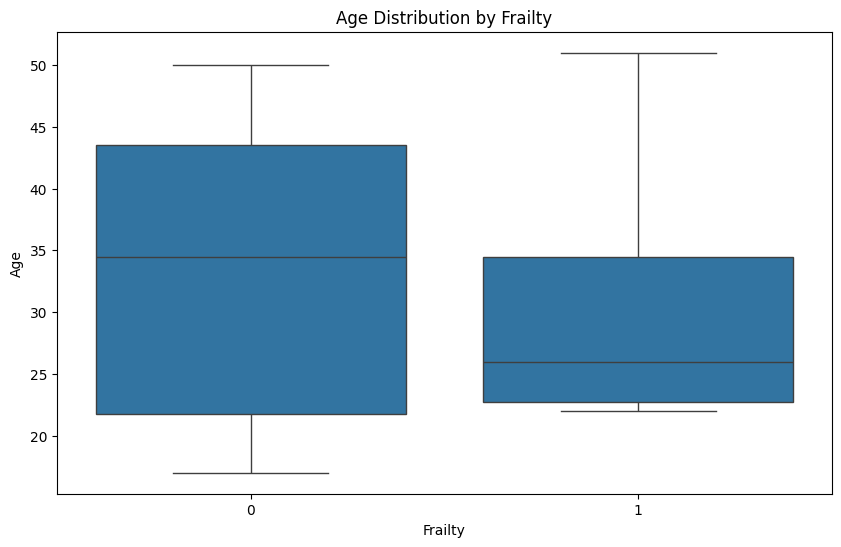

Summary Statistics of Age by Frailty:
         count       mean        std   min    25%   50%   75%   max
Frailty                                                            
0          6.0  33.333333  13.633293  17.0  21.75  34.5  43.5  50.0
1          4.0  31.250000  13.524669  22.0  22.75  26.0  34.5  51.0
Optimization terminated successfully.
         Current function value: 0.554207
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Frailty   No. Observations:                   10
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Tue, 13 Feb 2024   Pseudo R-squ.:                  0.1765
Time:                        03:10:46   Log-Likelihood:                -5.5421
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobu

In [9]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the data from the CSV file
df = pd.read_csv("/content/Clean_Frailty_Score.csv")

# Perform descriptive statistics
descriptive_stats = df.describe()

# Display the descriptive statistics
print(descriptive_stats)

# Perform t-test
t_statistic, p_value = ttest_ind(df[df['Frailty'] == 0]['Grip strength'], df[df['Frailty'] == 1]['Grip strength'])

# Display the preprocessed dataset
print("\nPreprocessed Dataset:")
print(df)

# Print t-test results
print("\nT-Statistic:", t_statistic)
print("P-Value:", p_value)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



# Visualization of age distribution by frailty category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Frailty', y='Age')
plt.title('Age Distribution by Frailty')
plt.xlabel('Frailty')
plt.ylabel('Age')
plt.show()

# Summary statistics of age by frailty category
summary_stats = df.groupby('Frailty')['Age'].describe()
print("Summary Statistics of Age by Frailty:")
print(summary_stats)

# Define the independent variables (age and grip strength)
X = df[['Age', 'Grip strength']]

# Add constant for the intercept term
X = sm.add_constant(X)

# Define the dependent variable (frailty score)
y = df['Frailty']

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of logistic regression
print(result.summary())